In [1]:
from google.colab import files

uploaded = files.upload()

In [2]:
import pandas as pd

df = pd.read_csv('/content/245_1.csv')
df

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,6855681.0,6.0,5,https://www.walmart.com/reviews/product/10294231,I'm dealing with dry eyes and very sensitive t...,Solves the problem,NaN,NaN,Seniorgal,"300650361040,631113253665,300650193108,3006503..."
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,71102868.0,1.0,5,https://www.walmart.com/reviews/product/10294231,Great stuff! Helps keep my contacts moist all ...,Great stuff!,NaN,NaN,Nammaw,"300650361040,631113253665,300650193108,3006503..."
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,58039428.0,0.0,5,https://www.walmart.com/reviews/product/10294231,Right price,My review,NaN,NaN,LDBoston,"300650361040,631113253665,300650193108,3006503..."
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",2017-06-28T15:23:21Z,2018-02-05T10:19:41Z,8.78982E+11,"878982005883,bebeaulait/50032623,08789820

In [3]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv("/content/245_1.csv")

# Display basic information about the dataset
print(df.info())
print(df.head())

# Identify relevant columns (e.g., review text, ratings, usernames)
review_column = 'reviews.text'  # Replace with actual column name


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [4]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords') # Download the stopwords dataset

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return ' '.join(tokens)
    else:
        return ''

review_column = 'reviews.text'  # Replace with the actual column name containing reviews
df['cleaned_review'] = df[review_column].astype(str).apply(clean_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from textblob import TextBlob

# Generate sentiments
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['cleaned_review'].apply(analyze_sentiment)

# Prepare the data
X = df['cleaned_review']
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Make predictions
y_pred = clf.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.71      0.08      0.15       989
     neutral       1.00      0.01      0.02       665
    positive       0.89      1.00      0.94     12555

    accuracy                           0.89     14209
   macro avg       0.86      0.36      0.37     14209
weighted avg       0.88      0.89      0.84     14209



In [6]:
# Define criteria for fake reviews (e.g., based on review length)
min_review_length = 20
df['is_genuine'] = df['cleaned_review'].apply(lambda x: len(x.split()) >= min_review_length)

genuine_reviews = df[df['is_genuine']]
fake_reviews = df[~df['is_genuine']]

print(f"Total genuine reviews: {len(genuine_reviews)}")
print(f"Total fake reviews: {len(fake_reviews)}")


Total genuine reviews: 23282
Total fake reviews: 47762


In [7]:
# Assuming you have a 'username' column
top_reviewers = genuine_reviews['reviews.username'].value_counts().head(10)
print("Top 10 reviewers:")
print(top_reviewers)

# Get reviews from a specific user
def get_user_reviews(username):
    return genuine_reviews[genuine_reviews['username'] == username]


Top 10 reviewers:
reviews.username
An anonymous customer    190
Anonymous                 37
ByAmazon Customer         13
Chris                     10
Melissa                   10
Mike                       8
Doug                       7
Susan                      7
Lisa                       7
Robert                     7
Name: count, dtype: int64


In [8]:
print(df['sentiment'].value_counts())



sentiment
positive    62851
negative     4948
neutral      3245
Name: count, dtype: int64


In [9]:
import pandas as pd
from textblob import TextBlob

# --- LOAD DATASET ---
try:
    df = pd.read_csv("/content/245_1.csv", nrows=23282)
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Filter out the initial 23282 rows
df = df.iloc[:23282]

# --- DEFINE TEXT COLUMN (CRITICAL!) ---
TEXT_COLUMN = 'reviews.text'  #  <----  **ADJUST THIS IF NEEDED!**

# --- HANDLE MISSING VALUES IN TEXT COLUMN ---
df[TEXT_COLUMN] = df[TEXT_COLUMN].fillna('')

# --- PERFORM SENTIMENT ANALYSIS ---
def analyze_sentiment(text):
    try:
        analysis = TextBlob(str(text))
        polarity = analysis.sentiment.polarity
        if polarity > 0.1:
            return 'positive'
        elif polarity < -0.1:
            return 'negative'
        else:
            return 'neutral'
    except Exception as e:
        print(f"Sentiment analysis error: {e}")
        return 'neutral'

df['sentiment'] = df[TEXT_COLUMN].apply(analyze_sentiment)

# --- COUNT THE SENTIMENTS ---
sentiment_counts = df['sentiment'].value_counts()

# --- PRINT THE COUNTS ---
print("Sentiment Counts:")
print(sentiment_counts)

# --- OPTIONAL: PRINT INDIVIDUAL COUNTS ---
print("\nIndividual Sentiment Counts:")
print(f"Positive: {sentiment_counts.get('positive', 0)}")
print(f"Negative: {sentiment_counts.get('negative', 0)}")
print(f"Neutral: {sentiment_counts.get('neutral', 0)}")


Data loaded successfully!
Sentiment Counts:
sentiment
positive    18949
neutral      3397
negative      936
Name: count, dtype: int64

Individual Sentiment Counts:
Positive: 18949
Negative: 936
Neutral: 3397


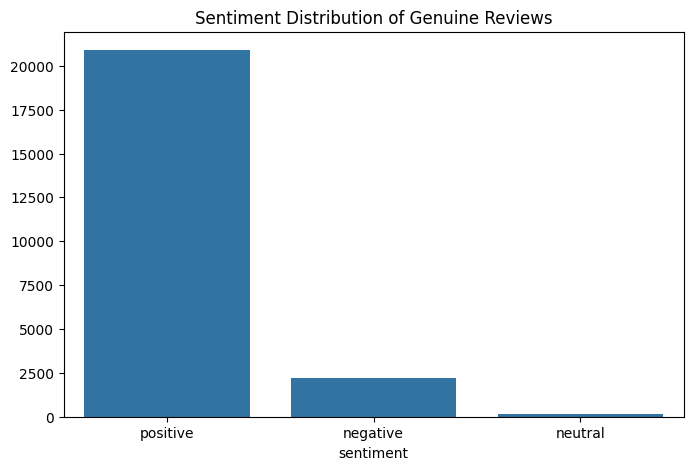

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sentiment_counts = genuine_reviews['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of Genuine Reviews')
plt.show()


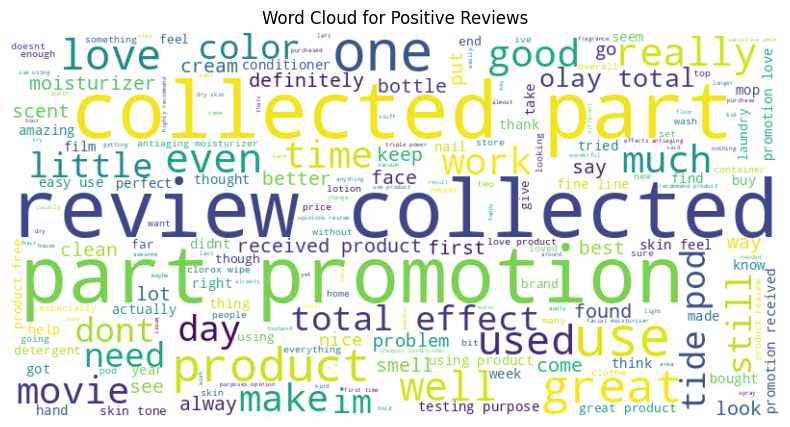

In [11]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_text = ' '.join(genuine_reviews[genuine_reviews['sentiment'] == 'positive']['cleaned_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


In [12]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
count_data = count_vectorizer.fit_transform(genuine_reviews['cleaned_review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(count_data)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f'Topic {index}:')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:
['dont', 'nails', 'really', 'time', 'color', 'love', 'good', 'like', 'great', 'movie']
Topic 1:
['product', 'clothes', 'love', 'pods', 'collected', 'promotion', 'review', 'clean', 'use', 'tide']
Topic 2:
['use', 'shampoo', 'received', 'collected', 'promotion', 'mop', 'review', 'conditioner', 'product', 'hair']
Topic 3:
['collected', 'promotion', 'using', 'face', 'review', 'dry', 'like', 'use', 'product', 'skin']
Topic 4:
['effects', 'total', 'using', 'olay', 'product', 'moisturizer', 'collected', 'promotion', 'review', 'skin']


In [13]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train_vec, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'alpha': 0.1}
Best score: 0.891686460807601


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)


In [15]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train_numeric)
y_test_encoded = to_categorical(y_test_numeric)


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ... (rest of your code) ...

# Assuming X_train_vec is your TF-IDF vectorized data
# Calculate the maximum sequence length
max_length = max([len(x.toarray()[0]) for x in X_train_vec])

# Pad the input sequences to the maximum length
X_pad = pad_sequences(X_train_vec.toarray(), maxlen=max_length, padding='post')

In [17]:
import tensorflow as tf

# Define your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(5000, 128, input_length=max_length),  # Assuming max_features=5000
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes for 'positive', 'negative', 'neutral'
])

# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
import tensorflow as tf

# Define a simpler model (example)
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(5000, 32, input_length=max_length),  # Further reduced embedding dimension
    tf.keras.layers.Flatten(),  # Flatten to remove recurrent components
    tf.keras.layers.Dense(16, activation='relu'),  # Smaller dense layer
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Subsample your data (e.g., 20%)
sample_size = int(0.2 * len(X_pad))
X_pad_sample = X_pad[:sample_size]
y_train_encoded_sample = y_train_encoded[:sample_size]

# Fit the model with reduced epochs, batch size, and sampled data
model.fit(X_pad_sample, y_train_encoded_sample, epochs=10, batch_size=32)

Epoch 1/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8045 - loss: 4.6597
Epoch 2/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8849 - loss: 0.7694
Epoch 3/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8867 - loss: 0.5969
Epoch 4/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8847 - loss: 0.5142
Epoch 5/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8853 - loss: 0.4709
Epoch 6/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8915 - loss: 0.4370
Epoch 7/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8831 - loss: 0.4465
Epoch 8/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8934 - loss: 0.4165
Epoch 9/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8863 - loss: 0.4321
Epoch 10/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8853 - loss: 0.4335


In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have these variables:
# - X_test_vec: Your TF-IDF vectorized test data
# - y_test_encoded: Your one-hot encoded test labels
# - max_length: The maximum sequence length from training
# - model: Your trained Keras model

# Pad the test data using the same max_length from training
max_length = max([len(x.toarray()[0]) for x in X_train_vec])  # Use the max_length from training data if not already defined
X_test_padded = pad_sequences(X_test_vec.toarray(), maxlen=max_length, padding='post')

# Evaluate the model on the test set
_, test_accuracy = model.evaluate(X_test_padded, y_test_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8836


In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import os
import pickle  # Import pickle at the beginning

In [21]:
# --- LOAD DATASET ---
try:
    # Specify the correct CSV file name
    csv_file_path = "/content/245_1.csv"
    df = pd.read_csv(csv_file_path)
except FileNotFoundError:
    print(f"Error: '{csv_file_path}' not found.  Make sure it's in the correct directory. Current working directory: {os.getcwd()}")
    exit()
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()

In [22]:
# --- HANDLE MISSING VALUES ---
df['reviews.text'] = df['reviews.text'].fillna('')

In [23]:
# --- PERFORM SENTIMENT ANALYSIS ---
def analyze_sentiment(text):
    try:
        analysis = TextBlob(str(text))
        polarity = analysis.sentiment.polarity
        if polarity > 0.1:
            return 'positive'
        elif polarity < -0.1:
            return 'negative'
        else:
            return 'neutral'
    except Exception as e:
        print(f"Sentiment analysis error: {e}")
        return 'neutral'

df['sentiment'] = df['reviews.text'].apply(analyze_sentiment)

In [24]:
# --- DEFINE FEATURES AND TARGETS ---
X = df['reviews.text']
y_sentiment = df['sentiment']


In [25]:
# --- Check and Prepare Username Column Robustly ---
if 'reviews.username' in df.columns:
    # Check for NaNs in the username column *before* splitting
    if df['reviews.username'].isnull().any():
        print("Warning: NaN values found in 'reviews.username'. Filling with 'Unknown'.")
        df['reviews.username'] = df['reviews.username'].fillna('Unknown')
    # Only proceed if there are *any* non-null usernames after filling
    if not df['reviews.username'].isnull().all():
        y_username = df['reviews.username']
    else:
        print("Username column is entirely null, even after filling. Skipping username model.")
        y_username = None
else:
    print("Username column 'reviews.username' not found. Skipping username model.")
    y_username = None

In [26]:
# --- SPLIT DATA (Sentiment) ---
X_train, X_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X, y_sentiment, test_size=0.2, random_state=42)

In [27]:
# --- VECTORIZE TEXT (Sentiment) ---
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [28]:
# --- TRAIN SENTIMENT MODEL ---
sentiment_model = MultinomialNB()
sentiment_model.fit(X_train_vec, y_sentiment_train)

MultinomialNB()

In [29]:
# --- TRAIN USERNAME MODEL (Conditional) ---
if y_username is not None:
    # Split data for username model
    X_train_username, X_test_username, y_username_train, y_username_test = train_test_split(
        X, y_username, test_size=0.2, random_state=42
    )

In [30]:

    # Vectorize text for username model
    vectorizer_username = TfidfVectorizer(max_features=5000)
    X_train_username_vec = vectorizer_username.fit_transform(X_train_username)
    X_test_username_vec = vectorizer_username.transform(X_test_username)